In [1]:
from grace.datasets import random_graph
from grace.models.classifier import GCN
from grace.models.train import train_model
from grace.models.datasets import dataset_from_graph

import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

In [2]:
G = random_graph()

In [3]:
pos = {idx: (node["x"], node["y"]) for idx, node in G.nodes(data=True)}

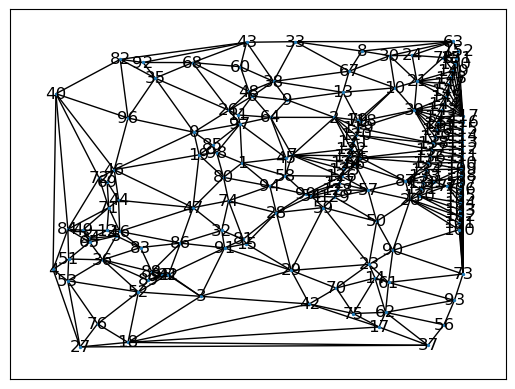

In [4]:
nx.draw_networkx(G, pos=pos, node_size=2, with_labels=True)

In [5]:
dataset = []

RNG = np.random.default_rng()

for i in range(100):
    G = random_graph(
        n_lines=RNG.integers(0, 10),
        n_chaff=RNG.integers(50, 1000),
        )
    d = dataset_from_graph(G)

    dataset += d

In [6]:
model = GCN(input_channels=3, hidden_channels=64)

train_model(model, dataset, epochs=100)

Epoch: 001, Train Acc: 0.8231, Test Acc: 0.8232
Epoch: 002, Train Acc: 0.8264, Test Acc: 0.8260
Epoch: 003, Train Acc: 0.8178, Test Acc: 0.8163
Epoch: 004, Train Acc: 0.8238, Test Acc: 0.8243
Epoch: 005, Train Acc: 0.8179, Test Acc: 0.8167
Epoch: 006, Train Acc: 0.8228, Test Acc: 0.8239
Epoch: 007, Train Acc: 0.8251, Test Acc: 0.8263
Epoch: 008, Train Acc: 0.8222, Test Acc: 0.8225
Epoch: 009, Train Acc: 0.8241, Test Acc: 0.8237
Epoch: 010, Train Acc: 0.8207, Test Acc: 0.8206
Epoch: 011, Train Acc: 0.8216, Test Acc: 0.8207
Epoch: 012, Train Acc: 0.8215, Test Acc: 0.8192
Epoch: 013, Train Acc: 0.8193, Test Acc: 0.8199
Epoch: 014, Train Acc: 0.8244, Test Acc: 0.8247
Epoch: 015, Train Acc: 0.8170, Test Acc: 0.8162
Epoch: 016, Train Acc: 0.8278, Test Acc: 0.8263
Epoch: 017, Train Acc: 0.8241, Test Acc: 0.8232
Epoch: 018, Train Acc: 0.8348, Test Acc: 0.8339
Epoch: 019, Train Acc: 0.8276, Test Acc: 0.8278
Epoch: 020, Train Acc: 0.8339, Test Acc: 0.8328
Epoch: 021, Train Acc: 0.8357, Test Acc:

In [13]:
test_G = random_graph(n_lines=3, n_chaff=300)
test_dataset = dataset_from_graph(test_G)

In [14]:
from scipy.special import softmax

In [15]:
model.eval()

predictions = []

for data in test_dataset:  # Iterate in batches over the training/test dataset.
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    probs = softmax(out.detach().numpy())

    predictions.append((int(pred.numpy()), probs))


In [16]:
pos = {idx: (node["x"], node["y"]) for idx, node in test_G.nodes(data=True)}

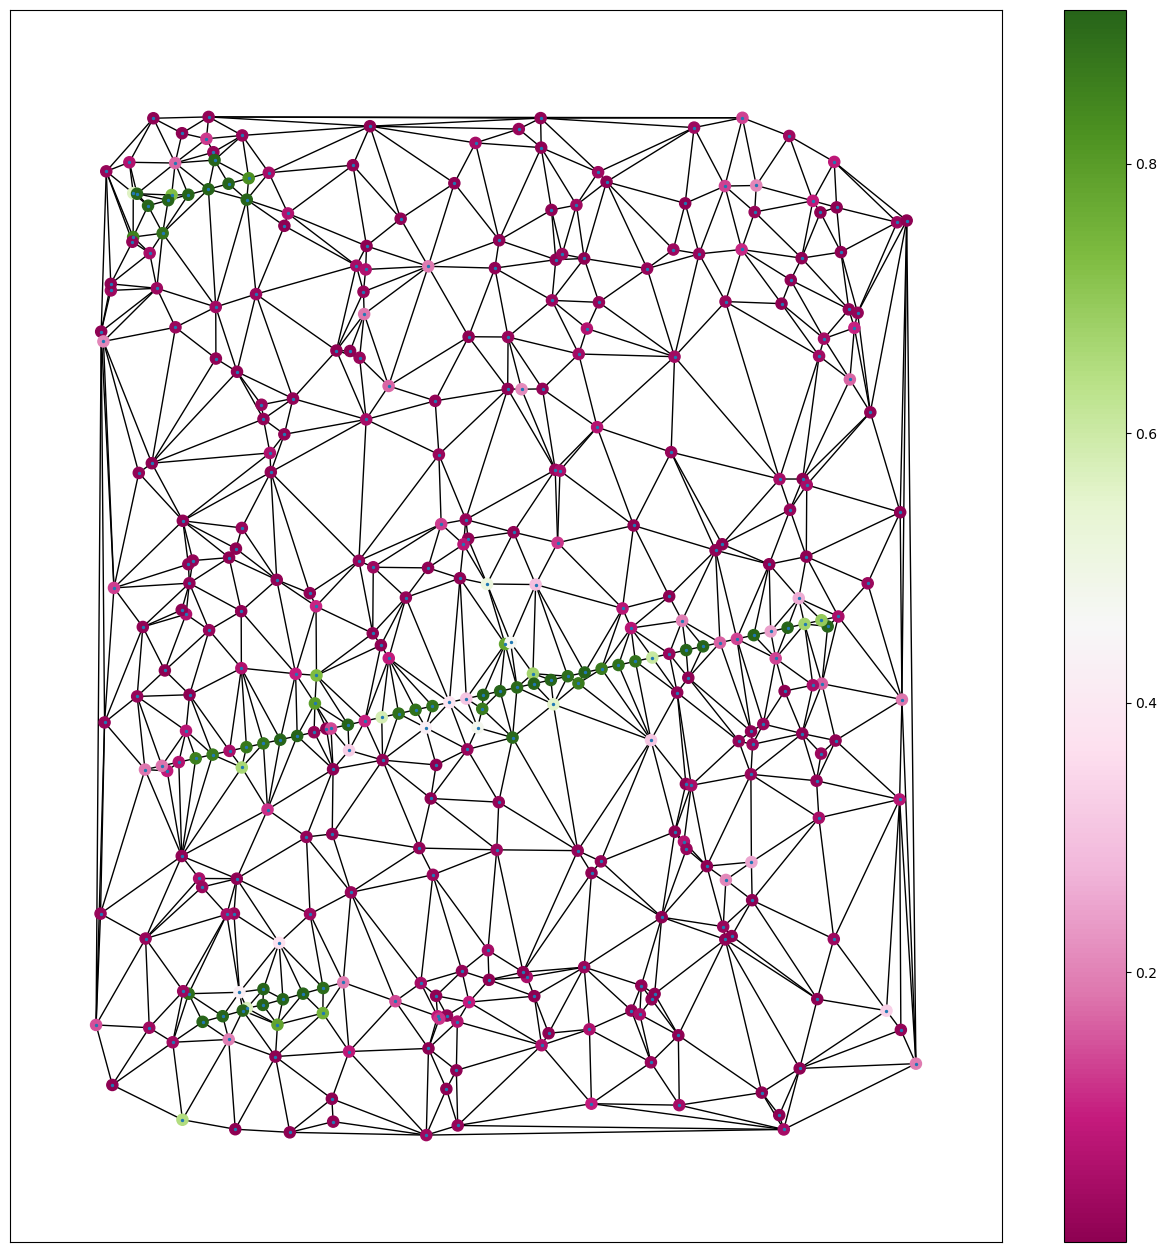

In [17]:
fig, ax = plt.subplots(figsize=(16, 16))
nx.draw_networkx(test_G, ax=ax, pos=pos, node_size=2, with_labels=False)

x = [p[0] for _, p in pos.items()]
y = [p[1] for _, p in pos.items()]

c = [pc[:, 1] for p, pc in predictions] 

scx = ax.scatter(x, y, s=64, c=c, cmap=plt.cm.PiYG)
fig.colorbar(scx)

In [12]:
len(predictions)

640

In [21]:
torch.save(model, "./gcn.pt")

In [20]:
import torch